In [11]:
library(tidyverse)
library(glue)
library(dplyr)

install.packages("showtext")
install.packages("extrafont")
library(extrafont)
font_import()


theme_rangeframe <- function(size = 0.3) {
    theme(
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )
}

scale_axis_rangeframe <- function() {
    guides(x = "axis_truncated", y = "axis_truncated")
}

rotate_x_text <- function(angle=45) {
    theme(
        axis.text.x = element_text(angle = angle, hjust = 1)
    )
}

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}

no_legend <- function() {
    theme(
        legend.position = "none"
    )
}

no_margin <- function() {
    theme(
        plot.margin = margin(0, 0, 0, 0, unit = "lines")
    )
}

no_label <- function() {
    theme(
        axis.title = element_blank()
    )
}

no_text <- function() {
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()
    )
}

no_x_text <- function() {
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
}

no_y_text <- function() {
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )
}


custom_theme <- function(size = 0.3){
    theme_minimal() +
    theme(
        text = element_text(family='Helvetica'),
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )

}
theme_set(custom_theme())

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}


also installing the dependencies ‘sysfonts’, ‘showtextdb’


Warning message in install.packages("showtext"):
“installation of package ‘sysfonts’ had non-zero exit status”
Warning message in install.packages("showtext"):
“installation of package ‘showtextdb’ had non-zero exit status”
Warning message in install.packages("showtext"):
“installation of package ‘showtext’ had non-zero exit status”
Registering fonts with R



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Bold.ttf
 : DejaVuSans-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf
 : DejaVuSans-BoldOblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-ExtraLight.ttf
 : DejaVuSans-ExtraLight already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Oblique.ttf
 : DejaVuSans-Oblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans.ttf
 : DejaVuSans already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-Bold.ttf
 : DejaVuSansCondensed-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-BoldOblique.ttf
 : DejaVuSansCondensed-BoldOblique already registered in fonts d

In [12]:
output_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/combosciplex/benchmark"

In [13]:
color_dict = c(
    "CellFlow"= "#B12F8C",
    "chemCPA"= "#A2E5E7",
    "CPA"= "#26B0B6",
    "Additive"="#C4925A")

In [14]:
# Updated R color dictionary with the new replacements
number_terms <- c(
  'Alvespimycin+Pirarubicin' = NULL,
  'Cediranib+PCI-34051' = 5,
  'Dacinostat+Danusertib' = NULL,
  'Dacinostat+Dasatinib' = 2,
  'Dacinostat+PCI-34051' = 4,
  'Givinostat+Carmofur' = NULL,
  'Givinostat+Cediranib' = 5,
  'Givinostat+Crizotinib' = 4,
  'Givinostat+Curcumin' = 4,
  'Givinostat+Dasatinib' = 3,
  'Givinostat+SRT1720' = 3,
  'Givinostat+SRT2104' = 4,
  'Givinostat+Sorafenib' = 4,  
  'Givinostat+Tanespimycin' = NULL,
  'Panobinostat+Alvespimycin' = 3,
  'Panobinostat+Crizotinib' = 3,
  'Panobinostat+Curcumin' = 3,
  'Panobinostat+Dasatinib' = 3,
  'Panobinostat+PCI-34051' = 3,
  'Panobinostat+SRT1720' = 3,
  'Panobinostat+SRT2104' = 3,
  'Panobinostat+SRT3025' = 3,
  'Panobinostat+Sorafenib' = 3,
  'SRT2104+Alvespimycin' = 4,
  'SRT3025+Cediranib' = 5,
  'control+Alvespimycin' = 2,
  'control+Dacinostat' = 2,
  'control+Dasatinib' = 2,
  'control+Givinostat' = 2,
  'control+Panobinostat' = 2,
  'control+SRT2104' = 2
)


# Decoded

In [15]:
results_decoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/allocation/ood_metrics_decoded.csv") 



New names:
• `` -> `...1`
Rows: 135 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [95]:

results_decoded <- results_decoded %>%
  filter(model %in% c("add", "otfm"))

In [96]:
results_cf = results_decoded %>%
  filter(model %in% c("otfm"))
results_add = results_decoded %>%
  filter(model %in% c("add"))

In [97]:
results_cf$diff <- results_cf$value - results_add$value
results_add$diff <- results_cf$value - results_add$value
results_add$err <- 1-results_add$value

In [98]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

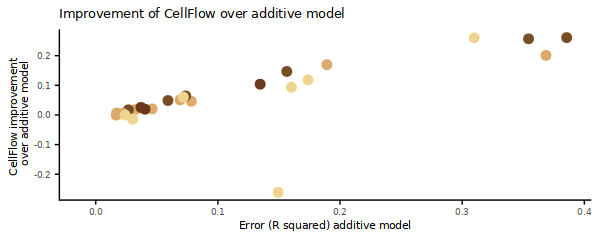

In [99]:
options(repr.plot.width = 5.0, repr.plot.height = 2.0, unit="cm")

# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)


x_min <- min(-0.01, min(results_add$err))
x_max <- max(results_add$err)

y_min <- min(-0.01, min(results_add$diff))
y_max <- max(results_add$diff)


# Define colors for each level of number_terms
colors <- c("5" = "#1E1009", "4" = "#DCAB6B", "3" = "#774E24", "2" = "#6A381F")
p <- ggplot(results_add, aes(x = err, y = diff, color = number_terms)) +
  geom_point(size = 2) +  # Increase the size of the points here
  labs(title = "Improvement of CellFlow over additive model", 
       x = "Error (R squared) additive model", 
       y = "CellFlow improvement \n over additive model",
       color = "Number of Terms ") +  # Legend title
  custom_theme() +
    article_text() +
    no_legend() +
    theme(
        panel.grid.major=element_blank(), 
        panel.grid.minor=element_blank()
    ) +
      xlim(x_min, x_max) +
      ylim(y_min, y_max) +
  scale_color_manual(values = colors) 
ggsave(file.path(output_dir, "cf_improvement_r_squared.pdf"), plot = p, device = "pdf", width = 5.0, height = 2.0, unit="cm")
p

# Encoded

In [100]:
results_encoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/allocation/ood_metrics_encoded.csv") 



New names:
• `` -> `...1`
Rows: 540 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [122]:
results_encoded <- results_encoded %>%
  filter(model %in% c("add", "otfm"))

In [123]:
results_cf = results_encoded %>%
  filter(model %in% c("otfm"))
results_add = results_encoded %>%
  filter(model %in% c("add"))

In [124]:
results_cf = results_cf %>%
  filter(metric %in% c("sinkhorn_div"))

results_add = results_add %>%
  filter(metric %in% c("sinkhorn_div"))


In [125]:
results_add$diff <- results_add$value - results_cf$value 

In [126]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

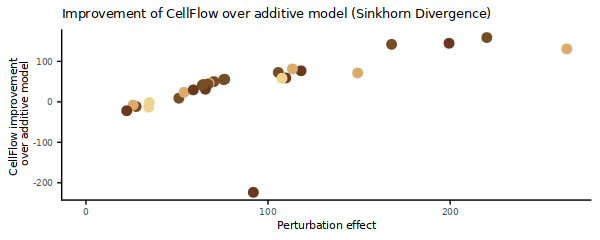

In [127]:
options(repr.plot.width = 5.0, repr.plot.height = 2.0, unit="cm")

# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)

x_min <- min(-0.1, min(results_add$value))
x_max <- max(results_add$value)

y_min <- min(-0.1, min(results_add$diff))
y_max <- max(results_add$diff)


# Define colors for each level of number_terms
colors <- c("5" = "#1E1009", "4" = "#DCAB6B", "3" = "#774E24", "2" = "#6A381F")
p <- ggplot(results_add, aes(x = value, y = diff, color = number_terms)) +
  geom_point(size = 2) +  # Increase the size of the points here
  labs(title = "Improvement of CellFlow over additive model (Sinkhorn Divergence)", 
       x = "Perturbation effect", 
       y = "CellFlow improvement \n over additive model",
       color = "Number of Terms ") +  # Legend title
  custom_theme() +
    article_text() +
    no_legend() +
    theme(
        panel.grid.major=element_blank(), 
        panel.grid.minor=element_blank()
    ) +
      xlim(x_min, x_max) +
      ylim(y_min, y_max) +
  scale_color_manual(values = colors)  # Manually set the colors for each level
ggsave(file.path(output_dir, "cf_improvement_sink_div.pdf"), plot = p, device = "pdf", width = 5.0, height = 2.0, unit="cm")
p

In [128]:
results_cf = results_encoded %>%
  filter(model %in% c("otfm"))
results_add = results_encoded %>%
  filter(model %in% c("add"))

results_cf = results_cf %>%
  filter(metric %in% c("mmd"))

results_add = results_add %>%
  filter(metric %in% c("mmd"))

In [129]:
results_add$diff <- results_add$value - results_cf$value 

In [130]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

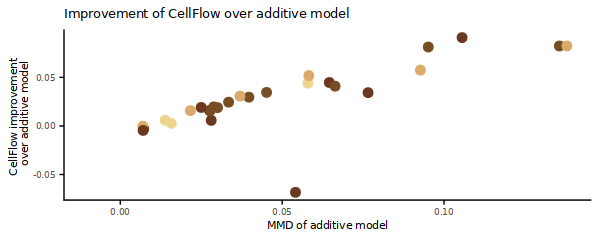

In [131]:
options(repr.plot.width = 5.0, repr.plot.height = 2.0, unit="cm")

# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)

x_min <- min(-0.01, min(results_add$value))
x_max <- max(results_add$value)

y_min <- min(-0.01, min(results_add$diff))
y_max <- max(results_add$diff)


# Define colors for each level of number_terms
colors <- c("5" = "#1E1009", "4" = "#DCAB6B", "3" = "#774E24", "2" = "#6A381F")
p <- ggplot(results_add, aes(x = value, y = diff, color = number_terms)) +
  geom_point(size = 2) +  # Increase the size of the points here
  labs(title = "Improvement of CellFlow over additive model", 
       x = "MMD of additive model", 
       y = "CellFlow improvement \n over additive model",
       color = "Number of Terms ") +  # Legend title
  custom_theme() +
    article_text() +
    no_legend() +
    theme(
        panel.grid.major=element_blank(), 
        panel.grid.minor=element_blank()
    ) +
      xlim(x_min, x_max) +
      ylim(y_min, y_max) +
  scale_color_manual(values = colors)  # Manually set the colors for each level
ggsave(file.path(output_dir, "cf_improvement_mmd.pdf"), plot = p, device = "pdf", width = 5.0, height = 2.0, unit="cm")
p

In [132]:
results_cf = results_encoded %>%
  filter(model %in% c("otfm"))
results_add = results_encoded %>%
  filter(model %in% c("add"))

results_cf = results_cf %>%
  filter(metric %in% c("e_distance"))

results_add = results_add %>%
  filter(metric %in% c("e_distance"))


In [133]:
results_add$diff <- results_add$value - results_cf$value

In [134]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

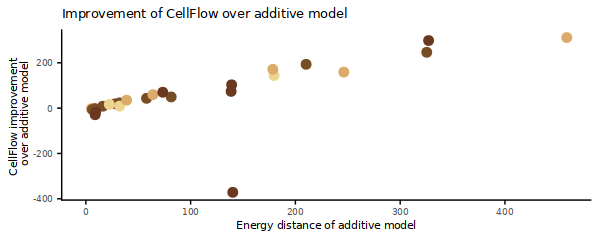

In [135]:
options(repr.plot.width = 5.0, repr.plot.height = 2.0)

# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)

x_min <- min(-0.1, min(results_add$value))
x_max <- max(results_add$value)

y_min <- min(-0.1, min(results_add$diff))
y_max <- max(results_add$diff)

# Define colors for each level of number_terms
colors <- c("5" = "#1E1009", "4" = "#DCAB6B", "3" = "#774E24", "2" = "#6A381F")
p <- ggplot(results_add, aes(x = value, y = diff, color = number_terms)) +
  geom_point(size = 2) +  # Increase the size of the points here
  labs(title = "Improvement of CellFlow over additive model", 
       x = "Energy distance of additive model", 
       y = "CellFlow improvement \n over additive model",
       color = "Number of Terms ") +  # Legend title
  custom_theme() +
    article_text() +
    no_legend() +
    theme(
        panel.grid.major=element_blank(), 
        panel.grid.minor=element_blank()
    ) +
      xlim(x_min, x_max) +
      ylim(y_min, y_max) +
  scale_color_manual(values = colors)   # Manually set the colors for each level
ggsave(file.path(output_dir, "cf_improvement_e_dist.pdf"), plot = p, device = "pdf", width = 5.0, height = 2.0, unit="cm")
p

# DEG

In [136]:
results_deg <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/allocation/ood_metrics_deg.csv") 



New names:
• `` -> `...1`
Rows: 540 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [137]:
results_deg <- results_deg %>%
  filter(model %in% c("add", "otfm"))

In [138]:
results_cf = results_deg %>%
  filter(model %in% c("otfm"))
results_add = results_deg %>%
  filter(model %in% c("add"))

In [139]:
results_cf = results_cf %>%
  filter(metric %in% c("r_squared"))

results_add = results_add %>%
  filter(metric %in% c("r_squared"))

In [140]:
results_add$diff <- results_cf$value - results_add$value
results_add$err <- 1-results_add$value

In [141]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

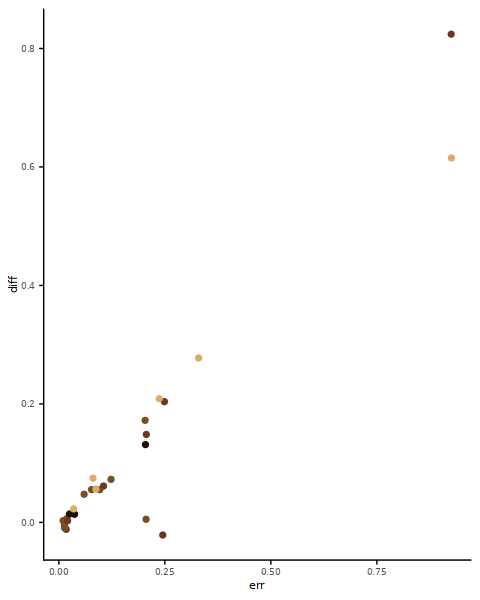

In [149]:
options(repr.plot.width = 4.0, repr.plot.height = 5.0)
# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)

# Define axis limits before they are used
x_min <- min(results_add$err, na.rm = TRUE)
x_max <- max(results_add$err, na.rm = TRUE)

y_min <- min(results_add$diff, na.rm = TRUE)
y_max <- max(results_add$diff, na.rm = TRUE)

# Define colors for each level of number_terms
colors <- c("5" = "#1E1009", "4" = "#DCAB6B", "3" = "#774E24", "2" = "#6A381F")

# Create plot
p <- ggplot(results_add, aes(x = err, y = diff, color = number_terms)) +
  geom_point(size = 1) +  # Increase the size of the points here
  #labs(title = "Improvement of CellFlow over additive model", 
  #     x = "Error (R squared DEG) additive model", 
  #     y = "CellFlow improvement \n over additive model",
  #     color = "Number of Terms ") +  # Legend title
  custom_theme() +
  article_text() +
  no_legend() +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank()
  ) +
  xlim(x_min, x_max) +
  ylim(y_min, y_max) +
  scale_color_manual(values = colors) 

# Save plot
ggsave(file.path(output_dir, "cf_improvement_deg_r_squared.pdf"), plot = p, device = "pdf", width = 3.5, height = 4.0, unit="cm")

# Display plot
p
